**Exploratory Data Analysis of Haberman's Dataset**

In [1]:
#Import all necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Load the data from csv
haber = pd.read_csv("haberman.csv",header=None)

#Print the values
print(haber.head())

    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1


Lets look into the shape of the data

In [2]:
haber.shape

(306, 4)

It seems there is no columns for this dataset. So we can insert the columns on our own for good understanding. The information i gathered from the kaggle page is as follow

Column 1: Age of patient at time of operation (numerical)
Column 2: Patient's year of operation (year - 1900, numerical)
Column 3: Number of positive axillary nodes detected (numerical)
Column 4: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

We will name these columns as follows

1. age
2. year_of_completion
3. pos_aux_nodes
4. survival_status


In [3]:
haber.columns = ['age', 'year_of_completion', 'pos_aux_node', 'survival_status']
print(haber.head())

   age  year_of_completion  pos_aux_node  survival_status
0   30                  64             1                1
1   30                  62             3                1
2   30                  65             0                1
3   31                  59             2                1
4   31                  65             4                1


Ensuring the header didn't get deleted

In [4]:
haber.shape

(306, 4)

As there is no change in the dimension of the data we can ensure no data is deleted. Lets get into the analysis :)

# Univariate Analysis

Lets see how the class is distributed

In [5]:
haber.survival_status.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

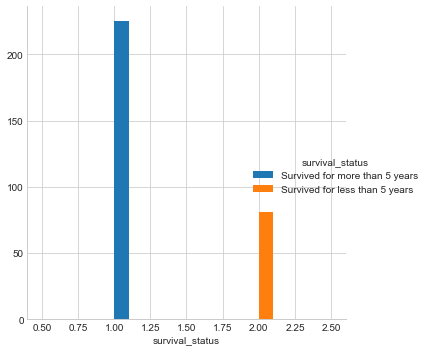

In [20]:
import seaborn as sns
sns.set_style("whitegrid");
g = sns.FacetGrid(haber, hue="survival_status", size=5) \
   .map(plt.hist, "survival_status") \
   .add_legend();
# replace labels
new_labels = ['Survived for more than 5 years', 'Survived for less than 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show();

The above shows that there are more than 200 people who have survived more than 5 years and below 100 people who have survived less than 5 years

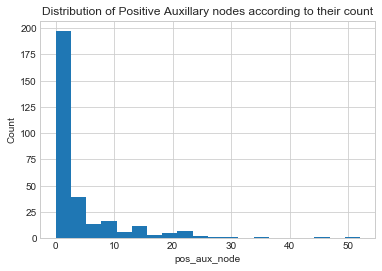

In [63]:
plt.close()
plt.hist(haber['pos_aux_node'],bins=20)
plt.title("Distribution of Positive Auxillary nodes according to their count")
plt.xlabel("pos_aux_node")
plt.ylabel("Count")
plt.show()

The above graph shows that the positive auxillary node is 0 for above 175 patients

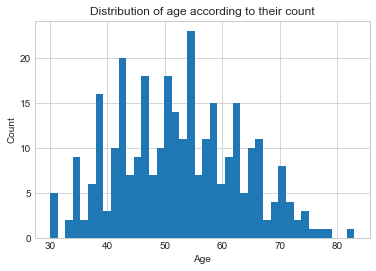

In [64]:
plt.close()
plt.hist(haber['age'],bins=40)
plt.title("Distribution of age according to their count")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

We can obersve from the above graphs

1. The Survival status of patient lived more than five is more than the patient died within 5 years
2. The number positive auxilary node is below 5 for 90% of the overall patients
3. The age is distibuted randomly 

# Bivariate Analysis 

## Scatter Plot

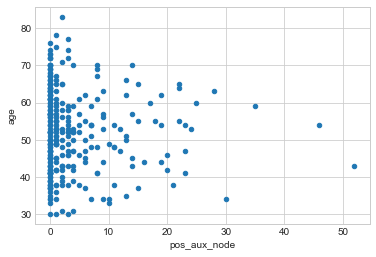

In [33]:
haber.plot(kind='scatter', x='pos_aux_node', y='age') ;
plt.show()


The above graph displayed using normal plot function. We can use seaborn to add more colors and legend to this same graph to visualize easily

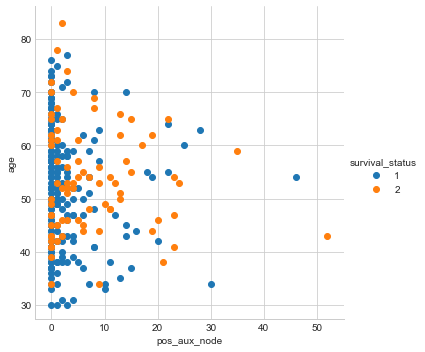

In [34]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="survival_status", size=5) \
   .map(plt.scatter, "pos_aux_node", "age") \
   .add_legend();
plt.show();


## 3D Plot

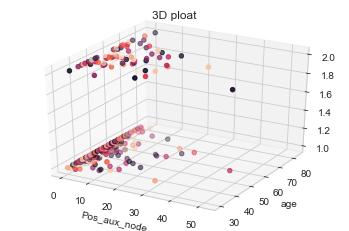

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = haber['pos_aux_node']
ys = haber['age']
zs = haber['survival_status']
colors = np.random.randint(0, 10, size=306)
ax.scatter(xs, ys, zs, c=colors,marker='o')
plt.title("3D ploat")
plt.xlabel("Pos_aux_node")
plt.ylabel("age")
plt.show()


We could visualize that the age is randomly distibuted where as the pos_aux_node are well separated in the 3d plane

## Pair plots

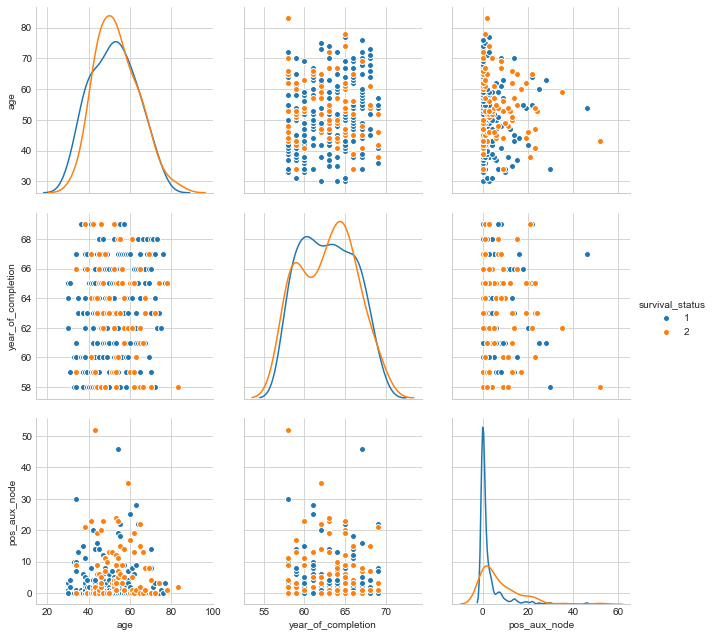

In [50]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="survival_status", size=3,vars=["age", "year_of_completion","pos_aux_node"],diag_kind='kde');
plt.show()

The above pair plot shows that pos_aux_node tends to be a good feature to classify the survival_status

# Multivariate Analysis

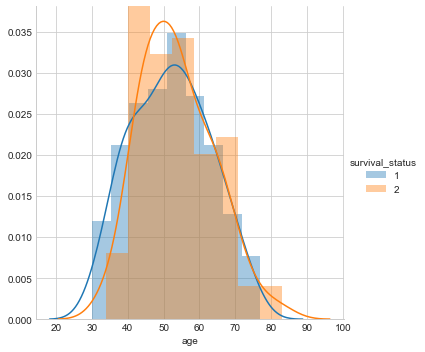

In [40]:
import warnings
warnings.filterwarnings("ignore")
plt.close()
sns.FacetGrid(haber, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

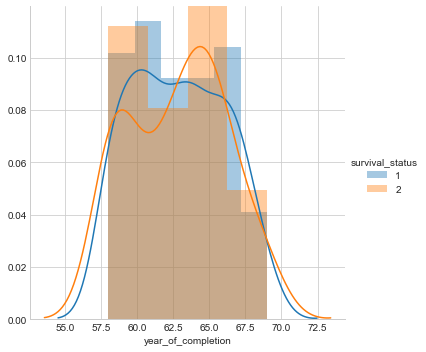

In [41]:
plt.close()
sns.FacetGrid(haber, hue="survival_status", size=5) \
   .map(sns.distplot, "year_of_completion") \
   .add_legend();
plt.show();

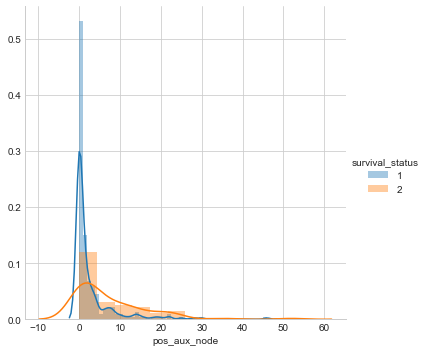

In [42]:
plt.close()
sns.FacetGrid(haber, hue="survival_status", size=5) \
   .map(sns.distplot, "pos_aux_node") \
   .add_legend();
plt.show();

Here we can infer that 

1. Age is evenly distributed among the survival status
2. Year of completion is also evenly distributed among the survival status
3. Most of number of positive auxilary nodes is 1 for the patients survived longer than 5 years and whereas for the patients died within 5 years has the no. of positive auxilary nodes > 2

Lets find the CDF of Positive auxilary nodes for the two classes

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


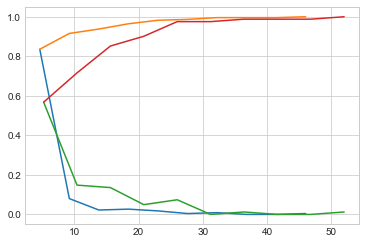

In [43]:
# Plots of CDF of positive auxilary nodes for various types of patients.

# Misclassification error if you use petal_length only.

haber_survived_1 = haber.loc[haber['survival_status'] == 1]
haber_survived_2 = haber.loc[haber['survival_status'] == 2]

#Patient's survived for more the 5 years
counts, bin_edges = np.histogram(haber_survived_1['pos_aux_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Patient's died within five years
counts, bin_edges = np.histogram(haber_survived_2['pos_aux_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

We can observe from the above cdf plot , the cumulative value 83% of the patients survived more than 5 year's postive auxilary nodes is below 5 and the cumulative value of the patients died within five years is 56% who has postived auxilary node as below 5

## Box plot  

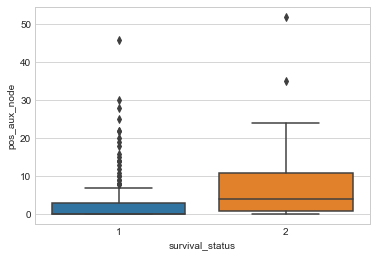

In [44]:
sns.boxplot(x='survival_status',y='pos_aux_node', data=haber)
plt.show()

There are more outlier for the No. of postive auxilary node for the survival_status - 1. The average value of pos_aux_node lies between 0 to 1

## Violin Plot

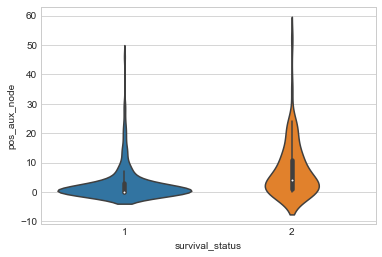

In [45]:
sns.violinplot(x="survival_status", y="pos_aux_node", data=haber, size=8)
plt.show()

The area of No. of positive auxilary node is close to 0 is more denser for the survival_status 1 which shows patients who lived more than 5 years has very less no. of positive auxilary node almost 0

## Countor Plot

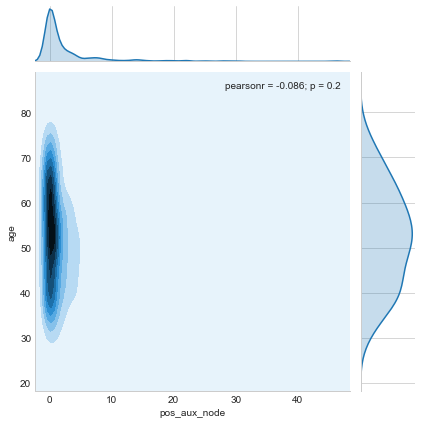

In [46]:
sns.jointplot(x="pos_aux_node", y="age", data=haber_survived_1, kind="kde");
plt.show();


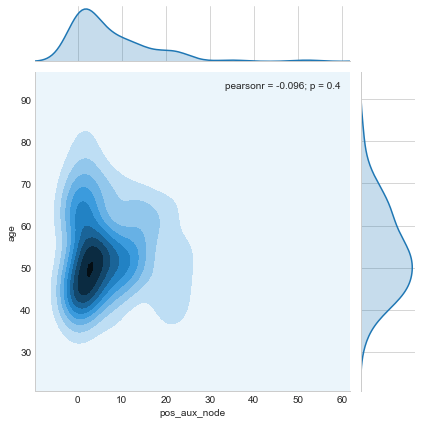

In [47]:
sns.jointplot(x="pos_aux_node", y="age", data=haber_survived_2, kind="kde");
plt.show();

The area of No. of positive auxilary node is close to 5 is more denser for the survival_status 2 which shows patients who died in less than 5 years has significant no. of positive auxilary node almost in the range 2-10

# Overall observation

1. From the above data visualization we can infer that the Number positive auxilary nodes feature is the most important one to classify the patients surivival status
2. The age and year of completion is evenly distributed and these features is less helpful in classifying the patient survial